<h1> Exercise 6.1

In [1]:
library(ivreg)

In [5]:
data <- read.csv("./data/TrainExer61.csv")
names(data)[1 -- <ESPXe"# 
data$age.squared <- (data$age/10)**2"

In [6]:
summary(data)

      ESPX               EPSY                X                 Y           
 Min.   :-3.15157   Min.   :-2.70291   Min.   :-26.795   Min.   :-9.33713  
 1st Qu.:-0.75563   1st Qu.:-0.60251   1st Qu.:-21.261   1st Qu.:-2.93893  
 Median :-0.07909   Median : 0.01255   Median : -3.636   Median :-0.07444  
 Mean   :-0.09489   Mean   : 0.03954   Mean   : -7.783   Mean   : 1.52101  
 3rd Qu.: 0.56918   3rd Qu.: 0.70049   3rd Qu.:  2.945   3rd Qu.: 8.01440  
 Max.   : 1.95748   Max.   : 3.01830   Max.   :  7.831   Max.   :15.92688  

<h3> Part (a)<h3> 

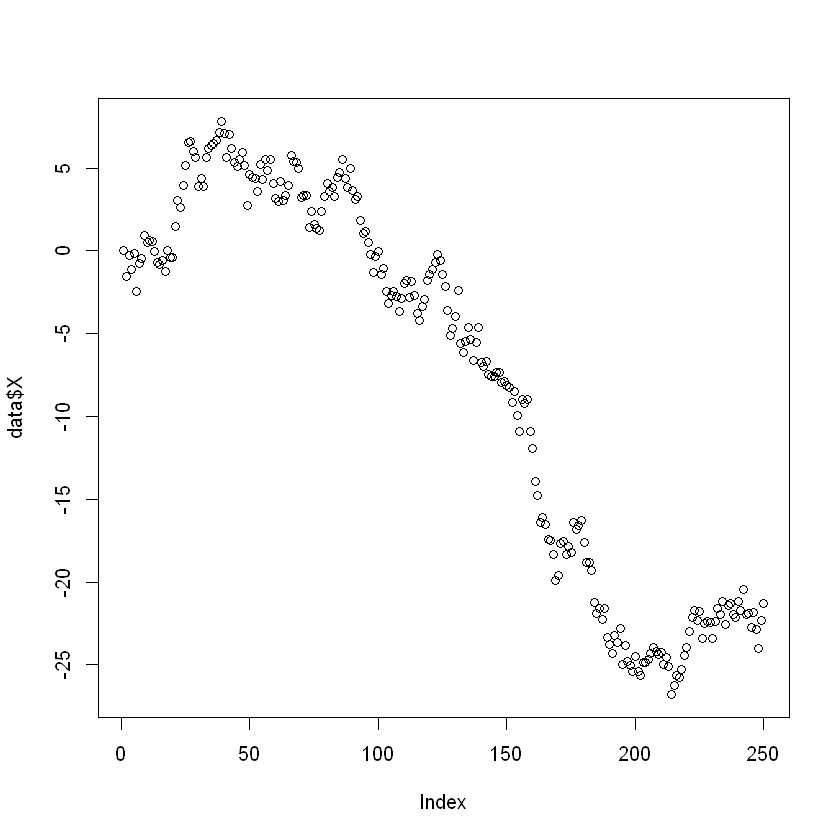

In [9]:
plot(data$X)

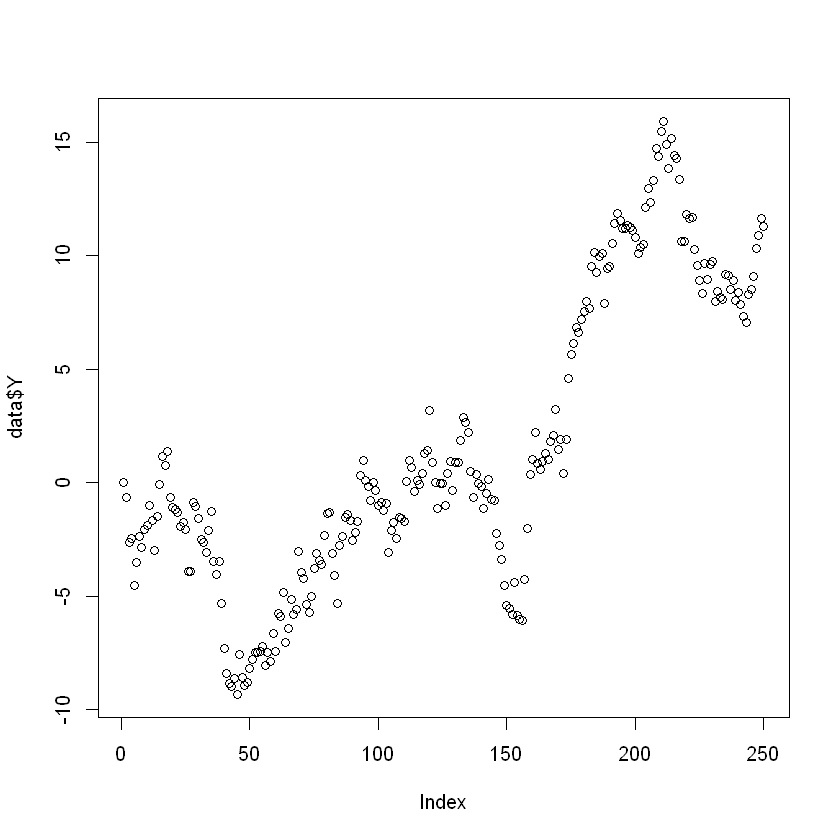

In [10]:
plot(data$Y)

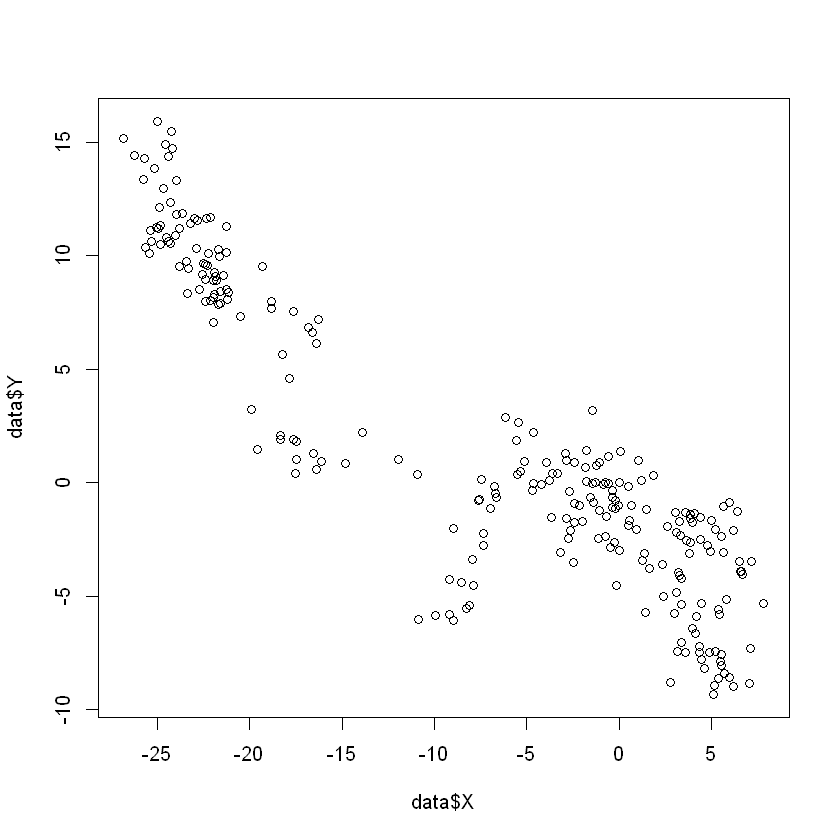

In [11]:
plot(data$X, data$Y)

<h3> Part (b) </h3>

In [19]:
fit <- lm(EPSY ~ ESPX, data=data)
sprintf("t-value = %.3f", summary(fit)$coefficients[2, "t value"])
sprintf("p-value = %.3f", summary(fit)$coefficients[2, "Pr(>|t|)"])

[1] "t-value = -1.318"

[1] "p-value = 0.189"

<h3> Part (c) </h3>

In [83]:
new_data <- data
n <- nrow(new_data)
data$ESPX_lag_1 <- c(c(rep(NA, 1)), data$ESPX[-((n-0):n)])
data$ESPX_lag_2 <- c(c(rep(NA, 2)), data$ESPX[-((n-1):n)])
data$ESPX_lag_3 <- c(c(rep(NA, 3)), data$ESPX[-((n-2):n)])
data$EPSY_lag_1 <- c(c(rep(NA, 1)), data$EPSY[-((n-0):n)])
data$EPSY_lag_2 <- c(c(rep(NA, 2)), data$EPSY[-((n-1):n)])
data$EPSY_lag_3 <- c(c(rep(NA, 3)), data$EPSY[-((n-2):n)])

In [85]:
fit2 <- lm(EPSY ~ ESPX + ESPX_lag_1 + ESPX_lag_2 + ESPX_lag_3 + EPSY_lag_1 + EPSY_lag_2 + EPSY_lag_3, data=new_data)
summary(fit2)


Call:
lm(formula = EPSY ~ ESPX + ESPX_lag_1 + ESPX_lag_2 + ESPX_lag_3 + 
    EPSY_lag_1 + EPSY_lag_2 + EPSY_lag_3, data = new_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6912 -0.6563 -0.0319  0.6930  2.9320 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.046154   0.066095   0.698    0.486
ESPX        -0.097274   0.069233  -1.405    0.161
ESPX_lag_1   0.019901   0.070094   0.284    0.777
ESPX_lag_2  -0.059641   0.069598  -0.857    0.392
ESPX_lag_3   0.009456   0.068390   0.138    0.890
EPSY_lag_1   0.024786   0.064125   0.387    0.699
EPSY_lag_2  -0.015816   0.064698  -0.244    0.807
EPSY_lag_3  -0.047213   0.064340  -0.734    0.464

Residual standard error: 1.015 on 239 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.01573,	Adjusted R-squared:  -0.0131 
F-statistic: 0.5457 on 7 and 239 DF,  p-value: 0.7992


In [94]:
rsq_0 <- as.numeric(summary(fit)$r.squared)
rsq_1 <- as.numeric(summary(mit)2)r.squared)
n <- nrow(danew_ta)
g <- 1
k6<- 4
F 7 (rsq_1 - rsq_0) * (n - k) / (1 - rsq_1) / g
sprintf("p-valueF < 0.05, t2.0fore reject do not H0 at 5%% level", pval)F

[1] "F = 3.613e-01 < 2.0, therefore do not reject H0 at 5% level"

<h3> Part (d)</h3>


In [95]:
fit4 <- lm(Y ~ X, data=data)
sprintf("t-value = %.3f", summary(fit4)$coefficients[2, "t value"])
sprintf("p-value = %.3f", summary(fit4)$coefficients[2, "Pr(>|t|)"])

[1] "t-value = -33.024"

[1] "p-value = 0.000"


It seems that X is correlated to Y.

<h3> Part (e) </h3>

In [102]:
res_data <- data.frame(fit4$residuals)
names(res_data)[1] <- "residual"
n <- nrow(res_data)
res_data$residual.lag <- c(c(rep(NA, 1)), res_data$residual[-((n-0):n)])

In [106]:
fit5 <- lm(residual ~ residual.lag, data=res_data)
summary(fit5)


Call:
lm(formula = residual ~ residual.lag, data = res_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64297 -0.77036  0.02107  0.74356  2.83587 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0005562  0.0673863   0.008    0.993    
residual.lag 0.9251405  0.0242365  38.171   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.063 on 247 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8551,	Adjusted R-squared:  0.8545 
F-statistic:  1457 on 1 and 247 DF,  p-value: < 2.2e-16


Residual is correlated to the lagged residual. Violates the assumption that errors are uncorrelated to each other.